In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [213]:
df = pd.read_csv('https://raw.githubusercontent.com/patoram123/Proyecto_Visualizacion/main/datasets/public_bikes_2018/seul/SeoulBikeData.csv'
                ,encoding='unicode escape')

In [211]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,01/01/2018,4290,11.5,-1.283333,39.333333,1.454167,1894.833333,-13.866667,0.255833,0.000000,0.000000
1,01/02/2018,5377,11.5,-3.866667,44.000000,1.608333,1923.625000,-15.012500,0.337083,0.000000,0.904167
2,01/03/2018,5132,11.5,0.450000,64.208333,3.554167,1084.000000,-6.387500,0.747500,0.104167,0.000000
3,01/04/2018,17388,11.5,15.183333,68.916667,1.570833,831.833333,9.370833,0.302083,0.000000,0.000000
4,01/05/2018,26820,11.5,20.341667,72.791667,1.437500,456.458333,15.120833,0.517500,0.000000,0.000000


In [214]:
df = df.groupby('Date', as_index=False).agg({'Rented Bike Count':'sum', 'Hour':'mean', 'Temperature(°C)':'mean',
                                        'Humidity(%)':'mean', 'Wind speed (m/s)':'mean', 
                                        'Visibility (10m)':'mean', 'Dew point temperature(°C)':'mean',
                                        'Solar Radiation (MJ/m2)':'mean', 'Rainfall(mm)':'mean', 
                                        'Snowfall (cm)':'mean'})

In [215]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,01/01/2018,4290,11.5,-1.283333,39.333333,1.454167,1894.833333,-13.866667,0.255833,0.000000,0.000000
1,01/02/2018,5377,11.5,-3.866667,44.000000,1.608333,1923.625000,-15.012500,0.337083,0.000000,0.904167
2,01/03/2018,5132,11.5,0.450000,64.208333,3.554167,1084.000000,-6.387500,0.747500,0.104167,0.000000
3,01/04/2018,17388,11.5,15.183333,68.916667,1.570833,831.833333,9.370833,0.302083,0.000000,0.000000
4,01/05/2018,26820,11.5,20.341667,72.791667,1.437500,456.458333,15.120833,0.517500,0.000000,0.000000


In [216]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [217]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,NaN,0.699824,0.028158,-0.174859,0.145376,0.602648,0.684069,-0.214252,-0.240836
Hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature(°C),0.699824,NaN,1.000000,0.401461,-0.258956,0.010578,0.962614,0.543482,0.139812,-0.267951
Humidity(%),0.028158,NaN,0.401461,1.000000,-0.224168,-0.556480,0.630265,-0.273534,0.528241,0.064247
Wind speed (m/s),-0.174859,NaN,-0.258956,-0.224168,1.000000,0.190390,-0.284104,0.107689,-0.081074,0.020792
Visibility (10m),0.145376,NaN,0.010578,-0.556480,0.190390,1.000000,-0.145833,0.264634,-0.218284,-0.101296
Dew point temperature(°C),0.602648,NaN,0.962614,0.630265,-0.284104,-0.145833,1.000000,0.377497,0.260644,-0.210823
Solar Radiation (MJ/m2),0.684069,NaN,0.543482,-0.273534,0.107689,0.264634,0.377497,1.000000,-0.323231,-0.231491
Rainfall(mm),-0.214252,NaN,0.139812,0.528241,-0.081074,-0.218284,0.260644,-0.323231,1.000000,-0.022493
Snowfall (cm),-0.240836,NaN,-0.267951,0.064247,0.020792,-0.101296,-0.210823,-0.231491,-0.022493,1.000000


In [24]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [219]:
X = df[['Temperature(°C)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']]
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 37,
                                                   shuffle      = True)

In [220]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [221]:
lasso = Lasso(alpha=0.5)
#
# Fit the Lasso model
#
lasso.fit(X_train_sc, y_train)
#
# Create the model score
#
lasso.score(X_train_sc, y_train),lasso.score(X_test_sc, y_test) 

(0.6393601331491383, 0.6710389890869254)

In [222]:
lasso.coef_

array([ 4074.54775683,  1222.25357331,  3592.04216035, -1755.1348238 ,
        -302.01174485])

In [223]:
# Training data
pred_train = lasso.predict(X_train_sc)
mse_train = mean_squared_error(y_train, pred_train,squared=False)
print('RMSE training set', round(mse_train, 2))

# Test data
pred = lasso.predict(X_test_sc)
mse_test =mean_squared_error(y_test, pred,squared=False)
print('RMSE test set', round(mse_test, 2))

RMSE training set 6161.04
RMSE test set 5809.67


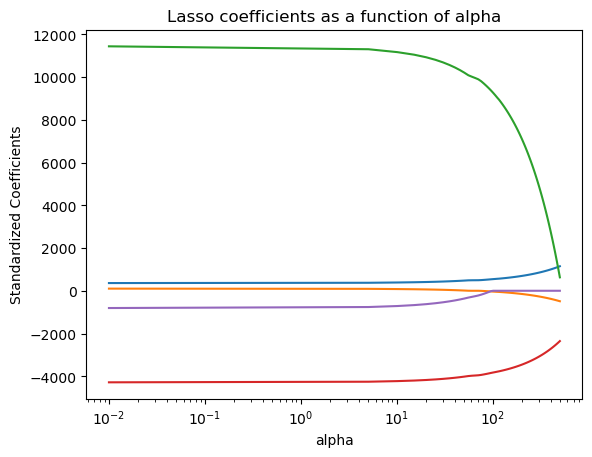

In [224]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [225]:
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=37, max_iter=100000)

# Fit model
model.fit(X_train_sc, y_train)

LassoCV(cv=5, max_iter=100000, random_state=37)

In [247]:
model.alpha_

31.14334527631556

In [227]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_sc, y_train)

Lasso(alpha=31.14334527631556)

In [228]:
print(list(zip(lasso_best.coef_, X)))

[(4223.741410569448, 'Temperature(°C)'), (1051.8886289931647, 'Dew point temperature(°C)'), (3569.32898151679, 'Solar Radiation (MJ/m2)'), (-1707.4725232964863, 'Rainfall(mm)'), (-270.770241764675, 'Snowfall (cm)')]


In [229]:
print('R squared training set', round(lasso_best.score(X_train_sc, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_sc, y_test)*100, 2))

R squared training set 63.93
R squared test set 67.23


In [239]:
print('RMSE test set', mean_squared_error(y_test, lasso_best.predict(X_test_sc),squared = False))

RMSE test set 5798.826771900098


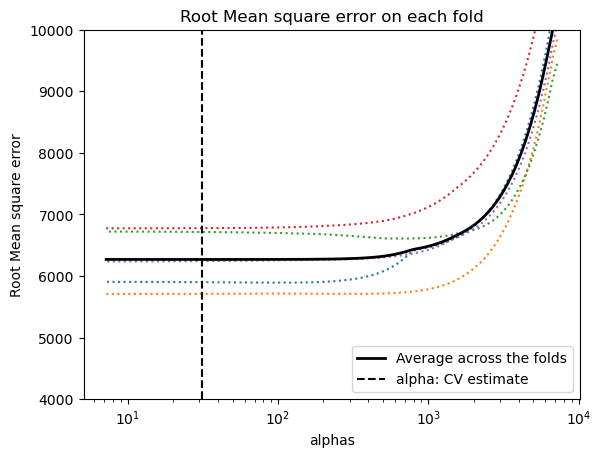

In [249]:
plt.semilogx(model.alphas_, np.sqrt(model.mse_path_), ":")
plt.plot(
    model.alphas_ ,
    np.sqrt(model.mse_path_).mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Root Mean square error")
plt.title("Root Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 4000, 10000
plt.ylim(ymin, ymax);